<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'match_result_test.csv',
 'groceries.csv',
 'scanner_data.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'online_retail_II.xlsx',
 '1_customers_dataset.csv',
 'bz_data_analyis.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'sample_data']

In [5]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a[0].lower()+a[1:])).lower() for a in df.columns]
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]
df.invoice_date = pd.to_datetime(df.invoice_date, infer_datetime_format = True)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-11-29
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29


In [7]:
df['rev'] = df.quantity * df.unit_price

In [9]:
cnt = df.groupby(['customerid', 'week'])['rev'].agg(['count', 'sum']).reset_index()
cnt.columns = ['id', 'week', 'count', 'sum']
cnt = cnt.sort_values(['id', 'week'], ascending=[1,1])
cnt.head()

,id,week,count,sum
0,12346.0,2011-01-17,1,77183.60
1,12747.0,2010-11-29,7,358.56
2,12747.0,2010-12-13,8,347.71
3,12747.0,2011-01-17,5,303.04
4,12747.0,2011-02-28,12,310.78


In [25]:
def get_ret(df) : 
  
  list_npu = cnt.groupby(['id']).head(1)
  list_week = cnt['week'].sort_values().unique()

  res = list()

  for weeks in list_week : 

    temp_npu = list_npu[list_npu['week'] == weeks]
    temp_pu = df[df['id'].isin(temp_npu['id'])]

    temp = temp_pu[['id', 'week']].drop_duplicates()
    temp = temp.groupby(['week'])['id'].count().reset_index().rename(columns = {'id':'pu'})

    temp = temp.assign(num = (temp['week'] - weeks).dt.days,
                       ratio = temp['pu'].apply(lambda x : round(x/np.max(temp['pu']) * 100,2)),
                       nru_week = str(weeks)[:10]
                       )
    temp = temp[['nru_week', 'num', 'pu','ratio']]
    res.append(temp)

  res = pd.concat(res).reset_index().drop(['index'], axis = 1)

  return res

In [26]:
res = get_ret(cnt)
res.head()

,nru_week,num,pu,ratio
0,2010-11-29,0,278,100.00
1,2010-11-29,7,58,20.86
2,2010-11-29,14,67,24.10
3,2010-11-29,21,19,6.83
4,2010-11-29,35,56,20.14


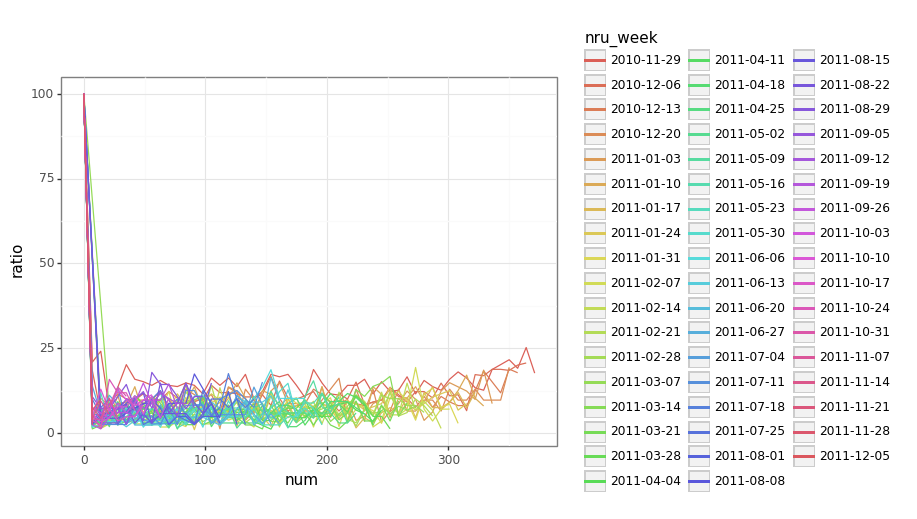

<ggplot: (8770878148217)>

In [28]:
(
    ggplot(res, aes('num', 'ratio', color = 'nru_week')) +
    gg.geom_line() +
    gg.theme_bw()
)

# Iterators

In [29]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [30]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}